In [171]:
import re
import os
import wave
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydub import AudioSegment
from IPython.display import Audio, display
import librosa
import librosa.display

drive.mount('/content/drive')
from google.colab import drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
PATH = "/content/drive/MyDrive/Colab Notebooks/Speech_Emotion/Crema"
AUDIO_PATH = "/content/drive/MyDrive/Colab Notebooks/Speech_Emotion/Crema/1001_DFA_ANG_XX.wav"

In [146]:
def playAudio(audio_file):
  audio = AudioSegment.from_wav(audio_file)
  # Play the audio
  audio.export('temp_audio.wav', format='wav')
  audio_data = open('temp_audio.wav', 'rb').read()
  display(Audio(audio_data))
  # Delete the temporary audio file
  os.remove('temp_audio.wav')

In [158]:
def plotWaveform(audio_file, title):
  # Plot the waveform
  audio = AudioSegment.from_wav(audio_file)
  samples = audio.get_array_of_samples()
  sample_rate = audio.frame_rate
  duration = len(samples) / sample_rate
  time = [t / sample_rate for t in range(len(samples))]
  plt.plot(time, samples)
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.title(title)
  plt.show()

In [159]:
def loadAndListenToAudio(dataset_path, class_name):
  D, Y = [], []
  # defining the regular expression
  audio_files = glob.glob(os.path.join(dataset_path, f"*{class_name}*.wav"))
  print(class_name)
  # play the audio
  playAudio(audio_files[0])
  # plot the spectrum
  plotWaveform(audio_files[0], class_name)
  for audio_file in audio_files: 
    D.append(audio_file)
    Y.append(class_name)
  return D, Y

In [160]:
def loadData(PATH):
  D, Y = [], []
  classes = ["SAD", "ANG", "DIS", "FEA", "HAP", "NEU"]
  for cls in classes: 
    d, y = loadAndListenToAudio(PATH, cls)
    D = np.concatenate((D, d))
    Y = np.concatenate((Y, y))
  return D, Y

SAD


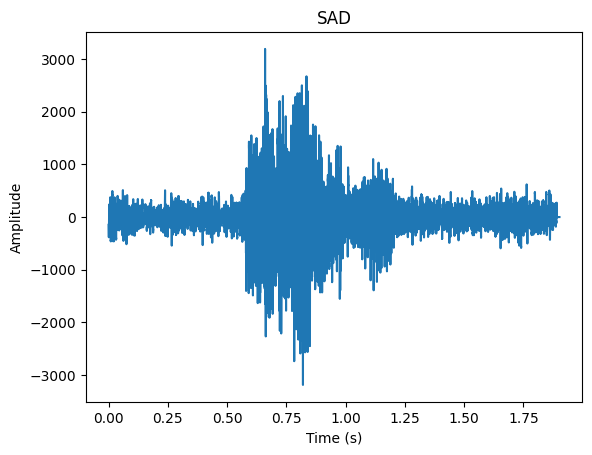

ANG


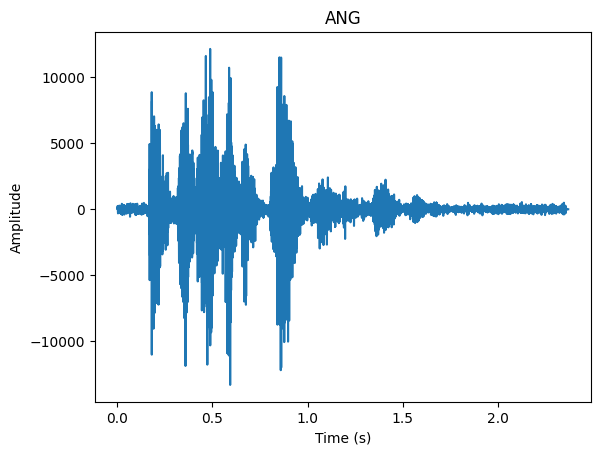

DIS


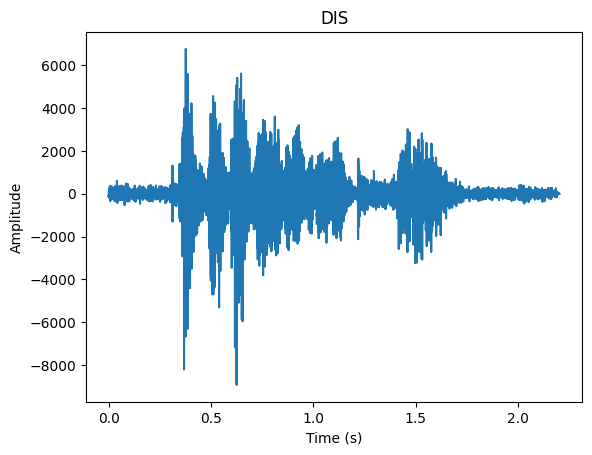

FEA


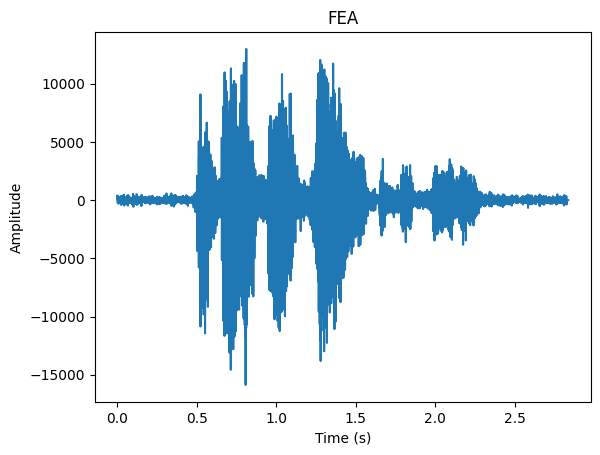

HAP


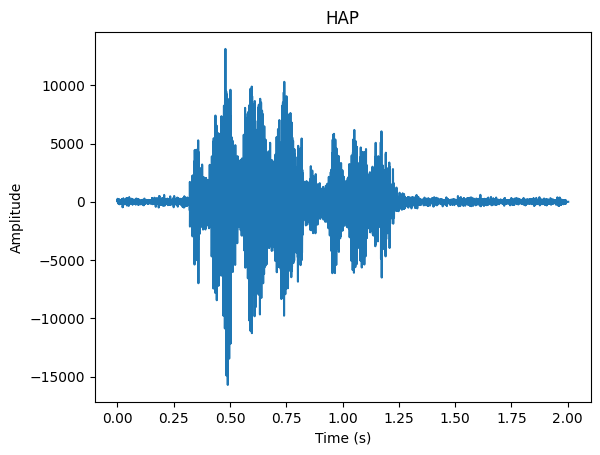

NEU


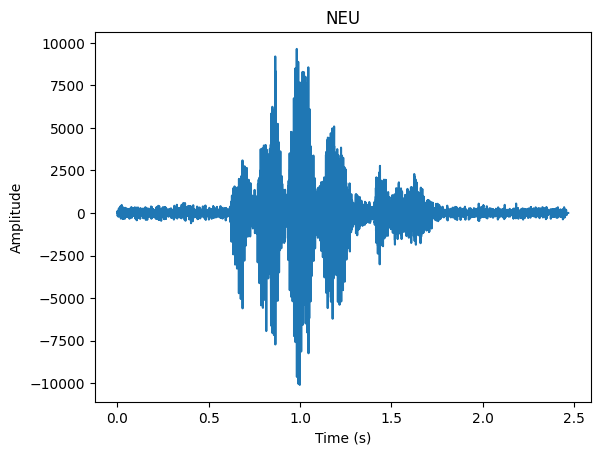

In [161]:
D, Y = loadData(PATH)

In [172]:
def visualize_waveform(audio, sr):
    plt.figure(figsize=(12, 4))
    plt.plot(audio)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.show()

In [173]:
def loadAndListenToAudiolib(dataset_path, class_name):
  D, Y = [], []
  # defining the regular expression
  audio_files = glob.glob(os.path.join(dataset_path, f"*{class_name}*.wav"))
  print(class_name)
  # play the audio
  playAudio(audio_files[0])
  # plot the spectrum
  audio, sr = librosa.load(audio_files[0])
  visualize_waveform(audio, sr)
  # plotWaveform(audio_files[0], class_name)
  for audio_file in audio_files: 
    D.append(audio_file)
    Y.append(class_name)
  return D, Y

In [174]:
def loadDatalib(PATH):
  D, Y = [], []
  classes = ["SAD", "ANG", "DIS", "FEA", "HAP", "NEU"]
  for cls in classes: 
    d, y = loadAndListenToAudiolib(PATH, cls)
    D = np.concatenate((D, d))
    Y = np.concatenate((Y, y))
  return D, Y